<a href="https://colab.research.google.com/github/tingjhenjiang/Segmentor/blob/master/Tensorflow_Certification_Test_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
def std_nparray(arr):
    arr = (arr-arr.min())/(arr.max()-arr.min())
    return(arr)

#  Boston House Pricing

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)
x_train = std_nparray(x_train)
x_test = std_nparray(x_test)
y_train = std_nparray(y_train)
y_test = std_nparray(y_test)

57344/57026 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_train)
print(y_train)

(404, 13)
[[1.73343179e-03 0.00000000e+00 1.14486639e-02 ... 2.95358650e-02
  5.58227848e-01 2.63291139e-02]
 [3.06188467e-05 1.16033755e-01 2.85513361e-03 ... 2.06751055e-02
  5.56090014e-01 4.37412096e-03]
 [6.88919831e-03 0.00000000e+00 2.54571027e-02 ... 2.84106892e-02
  5.28157525e-01 4.58509142e-03]
 ...
 [4.87482419e-05 4.92264416e-02 8.52320675e-03 ... 2.37693390e-02
  5.09493671e-01 1.10126582e-02]
 [3.02275668e-03 0.00000000e+00 2.75386779e-02 ... 2.06751055e-02
  3.68424754e-01 2.22081575e-02]
 [2.02390999e-05 8.43881857e-02 4.12095640e-03 ... 2.19409283e-02
  5.29817159e-01 6.16033755e-03]]
[0.22666667 0.82888889 1.         0.35777778 0.28222222 0.3
 0.14       0.23555556 0.23555556 0.20888889 0.15777778 0.28666667
 0.40222222 0.33111111 0.23777778 0.08444444 1.         0.38888889
 0.42444444 0.5        0.13111111 0.57333333 0.62       0.42222222
 0.3        0.18444444 0.39777778 0.66       0.25777778 0.27777778
 0.38444444 0.24666667 0.22       0.40222222 0.66444444 0.4444

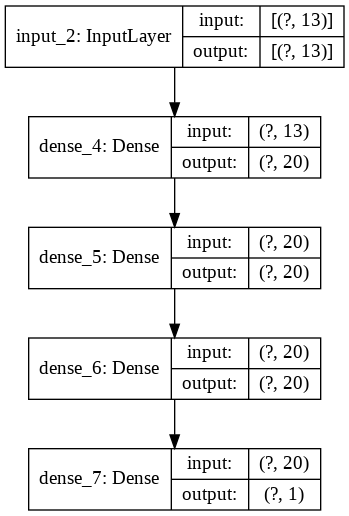

In [7]:
inputlayer = tf.keras.Input(
    shape=(x_train.shape[1],) #(None,)
    #, batch_size=None, name=None, dtype=None, sparse=False, tensor=None, ragged=False, **kwargs
)
nnlayer1 = tf.keras.layers.Dense(20, activation='relu')(inputlayer)
nnlayer2 = tf.keras.layers.Dense(20, activation='relu')(nnlayer1)
nnlayerfinal = tf.keras.layers.Dense(20, activation='relu')(nnlayer2)
dropoutlayer = tf.keras.layers.Dropout(
    rate=0.05
    #, noise_shape=None, seed=None, **kwargs
)(nnlayerfinal)
outputlayer = tf.keras.layers.Dense(1, activation='relu')(nnlayerfinal)
model = tf.keras.Model(inputs=inputlayer, outputs=outputlayer)
model.compile(optimizer = tf.keras.optimizers.RMSprop(),
              #optimizer=tf.keras.optimizers.SGD(),
              #optimizer=tf.keras.optimizers.Adam(0.001),
              #loss=tf.keras.losses.MeanSquaredError(),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy', 'mae'],
              )
#model.summary()
tf.keras.utils.plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [9]:
history = model.fit(x_train, y_train, batch_size=101, epochs=10, verbose=1, validation_data=(x_test, y_test))#

Epoch 1/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1136 - accuracy: 0.0124 - mae: 0.1136 - val_loss: 0.1333 - val_accuracy: 0.0098 - val_mae: 0.1333
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1126 - accuracy: 0.0124 - mae: 0.1126 - val_loss: 0.1322 - val_accuracy: 0.0098 - val_mae: 0.1322
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1129 - accuracy: 0.0124 - mae: 0.1129 - val_loss: 0.1329 - val_accuracy: 0.0098 - val_mae: 0.1329
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1121 - accuracy: 0.0099 - mae: 0.1121 - val_loss: 0.1305 - val_accuracy: 0.0098 - val_mae: 0.1305
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1132 - accuracy: 0.0099 - mae: 0.1132 - val_loss: 0.1308 - val_accuracy: 0.0098 - val_mae: 0.1308
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1122 - accuracy: 0.0124 - mae: 0.1122 - val_loss: 0.1300 - val_accuracy: 0.0

# cifar10

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = std_nparray(x_train)
x_test = std_nparray(x_test)
#y_train = std_nparray(y_train)
#y_test = std_nparray(y_test)

In [18]:
print(x_train.shape)
print(x_train)
print(y_train)

(50000, 32, 32, 3)
[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 

In [19]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)